# Task 1: Pandas Fundamentals & Exploration

## Part A: Data Loading

In [702]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customers_df = pd.read_csv('original_data/customers.csv')
products_df = pd.read_csv('original_data/products.csv')  
transactions_df = pd.read_csv('original_data/transactions.csv')


## Part B: Data Exploration

### 1. Basic Information

In [703]:
# first 5 rows of each dataframe

print(customers_df.head())
print("__"  *40)
print(products_df.head())
print("__"  *40)
print(transactions_df.head())
print("==" *40)

# last 5 rows of each dataframe

print(customers_df.tail())
print("__"  *40)
print(products_df.tail())
print("__"  *40)
print(transactions_df.tail())
print("==" *40)

# shape of each dataframe
print("Customers shape:", customers_df.shape)
print("Products shape:", products_df.shape)
print("Transactions shape:", transactions_df.shape)
print("==" *40)


# column names, data types and memory usage of each dataframe
print("Customers info:")
print(customers_df.info())
print("__"  *40)
print("Products info:")
print(products_df.info())
print("__"  *40)
print("Transactions info:")
print(transactions_df   .info())
print("==" *40)






  customer_id            name                     email registration_date  \
0        C001     Logan Brown                       NaN        2024-01-01   
1        C002  John Rodriguez   emma.johnson1@email.com        2024-01-02   
2        C003       Ava Davis                       NaN        2024-01-04   
3        C004   William Brown                       NaN        2024-01-06   
4        C005   Abigail Moore  william.jones4@email.com        2024-01-08   

     country age  
0     Canada  39  
1     France  28  
2  Australia  65  
3      Italy  33  
4     Canada  50  
________________________________________________________________________________
  product_id   product_name     category   price  stock
0       P001        Speaker  Electronics  353.96     15
1       P002   Science Book        Books   34.88  11246
2       P003        Sweater     Clothing   23.53     97
3       P004     Smartphone  Electronics   56.05     86
4       P005  Running Shoes       sports -339.29     50
______

### 2. Statistical Summary

In [704]:
# describing numerical columns in each dataframe


# customers dataframe has no numerical columns to describe
# we could have used describe(include='number') to get only numerical columns
print("Products statistical summary:")
print(products_df[['price','stock']].describe())
print("__"  *40)
print("Transactions statistical summary:")
print(transactions_df['quantity'].describe())
print("==" *40)

# describing categorical columns in each dataframe
print("Customers categorical summary:")
print(customers_df.describe(include='object'))
print("__"  *40)
print("Products categorical summary:")
print(products_df.describe(include='object'))
print("__"  *40)
print("Transactions categorical summary:")
print(transactions_df.describe(include='object'))
print("=="*40)

# identifying unique value counts for categorical columns in each dataframe
print("Customers unique value counts:")
print(customers_df.select_dtypes(include='object').nunique())
print("__"  *40)
print("Products unique value counts:")
print(products_df.select_dtypes(include='object').nunique())
print("__"  *40)
print("Transactions unique value counts:")
print(transactions_df.select_dtypes(include='object').nunique())
print("==" *40)





Products statistical summary:
            price         stock
count   47.000000     50.000000
mean   165.770638    615.700000
std    200.448722   2328.207581
min   -488.170000      0.000000
25%     41.880000     21.000000
50%    179.690000     61.000000
75%    298.270000     89.750000
max    491.100000  11246.000000
________________________________________________________________________________
Transactions statistical summary:
count    492.000000
mean       3.002033
std        1.410607
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: quantity, dtype: float64
Customers categorical summary:
       customer_id            name                      email  \
count          205             205                        185   
unique         200             160                        180   
top           C115  Noah Rodriguez  emily.johnson47@email.com   
freq             2               5                          2   

       registration

### 3. Data Quality Check

In [705]:
# checking for missing values in each dataframe

print("Customers missing values:")
print(customers_df.isnull().sum())
print("__"  *40)
print("Products missing values:")
print(products_df.isnull().sum())
print("__" * 40)
print("Transactions missing values:")
print(transactions_df.isnull().sum())
print("==" *40)

# checking for duplicate rows in each dataframe

print("Customers duplicate rows:", customers_df.duplicated().sum())
print("Products duplicate rows:", products_df.duplicated().sum())
print("Transactions duplicate rows:", transactions_df.duplicated().sum())
print("==" *40)

# identifying unusual values or patterns

# checking for negative prices or stock in products dataframe
print("Products with negative price or stock:")
print(products_df[(products_df['price'] < 0) | (products_df['stock'] < 0)])




Customers missing values:
customer_id           0
name                  0
email                20
registration_date     0
country               0
age                   0
dtype: int64
________________________________________________________________________________
Products missing values:
product_id      0
product_name    0
category        0
price           3
stock           0
dtype: int64
________________________________________________________________________________
Transactions missing values:
transaction_id       0
customer_id          0
product_id           0
quantity            16
transaction_date     0
payment_method       0
dtype: int64
Customers duplicate rows: 4
Products duplicate rows: 0
Transactions duplicate rows: 6
Products with negative price or stock:
   product_id   product_name     category   price  stock
4        P005  Running Shoes       sports -339.29     50
17       P018     Smartphone  Electronics -488.17     29
29       P030          Dress     Clothing -281.63  

## Part C: Basic Analysis

### 1. Customer Analysis

In [706]:
print(customers_df.head())
print("=="  *40)


# customers from each country
customers_from_each_country = customers_df['country'].value_counts()
print("Number of customers from each country:")
print(customers_from_each_country)
print("=="  *40)

# age distribution (min, max, mean, median)

min_age = customers_df['age'].min()
max_age = customers_df['age'].max()

# we would use this methods to calculate mean and median 
# but they are object type columns so the data contains string values so it needs to be cleaned first
"""
mean_age = customers_df['age'].mean(skipna=True)
median_age = customers_df['age'].median(skipna=True)

"""


print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print("==" * 40)

# month with number of sign-ups
month_with_most_signups = pd.to_datetime(customers_df['registration_date']).dt.month_name().value_counts().idxmax()
print(f"Month with the highest sign-ups: {month_with_most_signups}")



  customer_id            name                     email registration_date  \
0        C001     Logan Brown                       NaN        2024-01-01   
1        C002  John Rodriguez   emma.johnson1@email.com        2024-01-02   
2        C003       Ava Davis                       NaN        2024-01-04   
3        C004   William Brown                       NaN        2024-01-06   
4        C005   Abigail Moore  william.jones4@email.com        2024-01-08   

     country age  
0     Canada  39  
1     France  28  
2  Australia  65  
3      Italy  33  
4     Canada  50  
Number of customers from each country:
country
Canada            27
Australia         23
Germany           21
Italy             20
Japan             20
France            19
Netherlands       19
United Kingdom    17
Spain             15
United States     10
US                 8
USA                6
Name: count, dtype: int64
Minimum age: 18
Maximum age: 75
Month with the highest sign-ups: March


### 2. Product Analysis

In [707]:
# products in each category

print(products_df.head())
print("=="  *40)

products_in_each_category = products_df['category'].value_counts()
print("Number of products in each category:")
print(products_in_each_category)
print("==" *40)

# average price per category

average_price_per_category = round(products_df.groupby('category')['price'].mean(), 2)  
print("Average price per category:")
print(average_price_per_category)
print("==" *40)

# products that are out of stock

out_of_stock_products = products_df[products_df['stock']<=0]
print("Products that are out of stock:")
print(out_of_stock_products)

  product_id   product_name     category   price  stock
0       P001        Speaker  Electronics  353.96     15
1       P002   Science Book        Books   34.88  11246
2       P003        Sweater     Clothing   23.53     97
3       P004     Smartphone  Electronics   56.05     86
4       P005  Running Shoes       sports -339.29     50
Number of products in each category:
category
Books          13
Electronics    10
Clothing        9
Home            8
books           3
sports          2
Sports          2
home            2
electronics     1
Name: count, dtype: int64
Average price per category:
category
Books          147.92
Clothing       177.27
Electronics     84.78
Home           254.86
Sports         295.71
books          222.91
electronics    324.79
home           202.84
sports         -58.43
Name: price, dtype: float64
Products that are out of stock:
   product_id   product_name     category   price  stock
23       P024         Camera  Electronics  347.36      0
24       P025  Fictio

### 3. Transaction Analysis

In [708]:
print(transactions_df.head())
print("==" * 40)

# transactions per payment method

transactions_per_payment_method = transactions_df["payment_method"].value_counts()
print("Transactions per payment method:")
print(transactions_per_payment_method)
print("==" * 40)

# most popular product (most transactions)
most_popular_product = transactions_df['product_id'].value_counts().head(1)
print("Most popular product (most transactions):")
print(most_popular_product)
print("==" * 40)

# customer that made the most purchases

top_customer = transactions_df['customer_id'].value_counts().head(1)
print("Customer that made the most purchases:")
print(top_customer)


  transaction_id customer_id product_id  quantity transaction_date  \
0           T001        C178       P002       1.0       2024-01-01   
1           T002        C163       P015       5.0       2024-01-01   
2           T003        C124       P011       1.0       2024-01-02   
3           T004        C033       P008       2.0       2024-01-03   
4           T005        C161       P026       1.0       2024-01-03   

  payment_method  
0    Credit Card  
1         PayPal  
2    Credit Card  
3  Bank Transfer  
4    Credit Card  
Transactions per payment method:
payment_method
PayPal           173
Credit Card      166
Bank Transfer    149
CREDIT CARD        9
PAYPAL             6
BANK TRANSFER      5
Name: count, dtype: int64
Most popular product (most transactions):
product_id
P040    19
Name: count, dtype: int64
Customer that made the most purchases:
customer_id
C145    7
Name: count, dtype: int64


# Task 2: Data Cleaning & Quality Control 

## Part A: Identify Data Quality Issues 

### 1. checking customers.csv

In [709]:
print(customers_df.info())
print("=="  *40)
print(customers_df.head())
print("=="  *40)
# identifying number of missing values in email column
missing_emails = customers_df['email'].isnull().sum()
print(f"Number of missing emails: {missing_emails}")

# identifying number of duplicate rows
duplicate_rows = customers_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")



# identifying inconsistent data types in age column
has_non_numeric = (~customers_df['age'].astype(str).str.isdigit()).any() # ~ negates the boolean series to check if any non-numeric values exist
print(f"Has non-numeric age values: {has_non_numeric}")
# cleaning up the inconsistent country names

# here we can see different variations of the same country names
countries = customers_df['country'].value_counts()
print(countries)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        205 non-null    object
 1   name               205 non-null    object
 2   email              185 non-null    object
 3   registration_date  205 non-null    object
 4   country            205 non-null    object
 5   age                205 non-null    object
dtypes: object(6)
memory usage: 9.7+ KB
None
  customer_id            name                     email registration_date  \
0        C001     Logan Brown                       NaN        2024-01-01   
1        C002  John Rodriguez   emma.johnson1@email.com        2024-01-02   
2        C003       Ava Davis                       NaN        2024-01-04   
3        C004   William Brown                       NaN        2024-01-06   
4        C005   Abigail Moore  william.jones4@email.com        2024-01-08   

     country

### 2. checking products.csv

In [710]:
print(products_df.info())
print("=="  *40)
print(products_df.head())
print("=="  *40)

# number of missing values in price column
missing_prices = products_df['price'].isnull().sum()
print(f"Number of missing prices: {missing_prices}")
# number of negative prices
negative_prices = (products_df['price'] < 0).sum()
print(f"Number of negative prices: {negative_prices}")
# number of stock values that are greater than 200
unrealistic_stock_values = (products_df['stock'] > 200).sum()
print(f"Number of stock values that are >200: {unrealistic_stock_values}")

# checking if there is Whitespace around product names
has_whitespace = products_df['product_name'].str.contains(r'^\s+|\s+$').any() # regex to check for leading or trailing whitespace i looked it up online
print(f"Has whitespace around product names: {has_whitespace}")

# checking for inconsistent category names
category_names = products_df['category'].value_counts()
print(category_names)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    50 non-null     object 
 1   product_name  50 non-null     object 
 2   category      50 non-null     object 
 3   price         47 non-null     float64
 4   stock         50 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB
None
  product_id   product_name     category   price  stock
0       P001        Speaker  Electronics  353.96     15
1       P002   Science Book        Books   34.88  11246
2       P003        Sweater     Clothing   23.53     97
3       P004     Smartphone  Electronics   56.05     86
4       P005  Running Shoes       sports -339.29     50
Number of missing prices: 3
Number of negative prices: 3
Number of stock values that are >200: 3
Has whitespace around product names: True
category
Books          13
Electronics    10
Clothing  

### 3. checking transactions.csv

In [711]:
print(transactions_df.info())
print("=="  *40)
print(transactions_df.head())
print("=="  *40)

# number of missing values in quantity column
missing_quantities = transactions_df['quantity'].isnull().sum()
print(f"Number of missing quantities: {missing_quantities}")
# number of duplicate transactions_ids
duplicate_transaction_ids = transactions_df['transaction_id'].duplicated().sum()
print(f"Number of duplicate transaction IDs: {duplicate_transaction_ids}")
# checking if customer ids in transactions exist in customers dataframe
valid_ids = customers_df['customer_id'].values
invalid_customer_ids = transactions_df[~transactions_df['customer_id'].isin(valid_ids)].shape[0] # counting invalid customer ids
print(f"Number of invalid customer IDs: {invalid_customer_ids}")
# checking for any future dates
is_future_date = (pd.to_datetime(transactions_df['transaction_date']) > pd.Timestamp.now()).any()
print(f"Are there any future transaction dates: {is_future_date}")
# checking for inconsistent payment methods
payment_methods = transactions_df['payment_method'].value_counts()
print(payment_methods)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    508 non-null    object 
 1   customer_id       508 non-null    object 
 2   product_id        508 non-null    object 
 3   quantity          492 non-null    float64
 4   transaction_date  508 non-null    object 
 5   payment_method    508 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.9+ KB
None
  transaction_id customer_id product_id  quantity transaction_date  \
0           T001        C178       P002       1.0       2024-01-01   
1           T002        C163       P015       5.0       2024-01-01   
2           T003        C124       P011       1.0       2024-01-02   
3           T004        C033       P008       2.0       2024-01-03   
4           T005        C161       P026       1.0       2024-01-03   

  payment_method  
0    Credit Card  
1  

## Part B: Data Cleaning Implementation

### 1. Handle Missing Values

In [712]:
# dropping rows with missing email from customers df

clean_customers_df = customers_df.copy()
clean_transactions_df = transactions_df.copy()
clean_products_df = products_df.copy()

clean_customers_df = clean_customers_df.dropna(subset=['email']) # drop rows where email is nan

# filling price with median price of same category instead of nan in products df

# here i grouped by category and in each category i calculated the median from each one and filled NANs with it
clean_products_df = clean_products_df.fillna(clean_products_df.groupby('category')['price'].transform('median'))

# filling quantity with mode in transactions df
# here im filling every NAN with most common value --> mode()[0] -- selects 1st most common value
clean_transactions_df = clean_transactions_df.fillna(clean_transactions_df['quantity'].mode()[0])

### 2. Remove Duplicates

In [713]:
# removing duplicate rows from products df, customers df and transactions df
number_of_duplicates_in_products_df = clean_products_df.duplicated().sum()
number_of_duplicates_in_customers_df = clean_customers_df.duplicated().sum()
number_of_duplicates_in_transactions_df = clean_transactions_df.duplicated().sum()

print(f"duplicates before cleaning in products_df: {number_of_duplicates_in_products_df}")
print(f"duplicates before cleaning in customers_df: {number_of_duplicates_in_customers_df}")
print(f"duplicates before cleaning in transactions_df: {number_of_duplicates_in_transactions_df}")

print('==' * 40)

clean_products_df = clean_products_df.drop_duplicates()
clean_customers_df = clean_customers_df.drop_duplicates()
clean_transactions_df = clean_transactions_df.drop_duplicates()

number_of_duplicates_in_products_df = clean_products_df.duplicated().sum()
number_of_duplicates_in_customers_df = clean_customers_df.duplicated().sum()
number_of_duplicates_in_transactions_df = clean_transactions_df.duplicated().sum()

print(f"duplicates after cleaning in products_df: {number_of_duplicates_in_products_df}")
print(f"duplicates after cleaning in customers_df: {number_of_duplicates_in_customers_df}")
print(f"duplicates after cleaning in transactions_df: {number_of_duplicates_in_transactions_df}")



duplicates before cleaning in products_df: 0
duplicates before cleaning in customers_df: 4
duplicates before cleaning in transactions_df: 6
duplicates after cleaning in products_df: 0
duplicates after cleaning in customers_df: 0
duplicates after cleaning in transactions_df: 0


### 3. Fix Data Types

In [714]:
# converting age columns to integer
clean_customers_df['age'] = clean_customers_df['age'].astype(str).str.extract(r'(\d+)')[0].astype(int) # this extracts first number occurrence using regex

# Converting date columns to datetime format
# in customers_df registration_date and in transaction_df transaction_date
clean_customers_df['registration_date'] = pd.to_datetime(clean_customers_df['registration_date'])
clean_transactions_df['transaction_date'] = pd.to_datetime(clean_transactions_df['transaction_date'])

# Ensuring price in products and quantity in transactions are numeric

clean_products_df['price'] = pd.to_numeric(clean_products_df['price'])
clean_transactions_df['quantity'] = pd.to_numeric(clean_transactions_df['quantity'])





### 4. Standardize Values

In [715]:
# replacing ”US”, ”USA” with ”United States”

country_mapping = {
    'USA': 'United States',
    'US': 'United States'
}

clean_customers_df['country'] = clean_customers_df['country'].replace(country_mapping)



countries = clean_customers_df['country'].value_counts()
print(countries)
print("==" *40 )

# Striping whitespace from text columns
clean_products_df['product_name'] = clean_products_df['product_name'].str.strip() 
clean_products_df['category'] = clean_products_df['category'].str.strip() 
clean_transactions_df['payment_method'] = clean_transactions_df['payment_method'].str.strip() 
clean_customers_df['name'] = clean_customers_df['name'].str.strip() 
clean_customers_df['email'] = clean_customers_df['email'].str.strip() 

# Converting email addresses to lowercase
clean_customers_df["email"] = clean_customers_df["email"].str.lower() # convert to string to use .lower()




country
Canada            22
Germany           20
Australia         20
United States     20
France            18
Italy             18
United Kingdom    17
Netherlands       17
Japan             16
Spain             13
Name: count, dtype: int64


### 5. Handle Outliers & Invalid Data

In [716]:
# converting negative prices to positive 
clean_products_df["price"] = clean_products_df['price'].abs()

# Cap unrealistic stock levels at 500
clean_products_df['stock'] = clean_products_df['stock'].clip(upper=500)

# Remove transactions with invalid customer_id references

clean_transactions_df = clean_transactions_df[clean_transactions_df['customer_id'].isin(clean_customers_df['customer_id'])]

# Remove future dates from transactions

clean_transactions_df = clean_transactions_df[clean_transactions_df['transaction_date'] <= pd.Timestamp.now()]


## Part C: Validation & Documentation

### 1. Create Cleaning Report

In [717]:
# Create summary dictionaries for each dataset
cleaning_summary = {
    'customers': {
        'Original Rows': len(customers_df),
        'Cleaned Rows': len(clean_customers_df),
        'Rows Removed': len(customers_df) - len(clean_customers_df),
        'Missing Values Before': customers_df.isnull().sum().sum(),
        'Missing Values After': clean_customers_df.isnull().sum().sum(),
        'Duplicates Removed': len(customers_df) - len(customers_df.drop_duplicates()),
        'Data Type Corrections': 'age (object→int), registration_date (object→datetime), email (lowercase)'
    },
    'transactions': {
        'Original Rows': len(transactions_df),
        'Cleaned Rows': len(clean_transactions_df),
        'Rows Removed': len(transactions_df) - len(clean_transactions_df),
        'Missing Values Before': transactions_df.isnull().sum().sum(),
        'Missing Values After': clean_transactions_df.isnull().sum().sum(),
        'Duplicates Removed': len(transactions_df) - len(transactions_df.drop_duplicates()),
        'Outliers Handled': 'Future dates removed, Invalid customer IDs removed',
        'Data Type Corrections': 'transaction_date (object→datetime), quantity (object→numeric)'
    },
    'products': {
        'Original Rows': len(products_df),
        'Cleaned Rows': len(clean_products_df),
        'Rows Removed': len(products_df) - len(clean_products_df),
        'Missing Values Before': products_df.isnull().sum().sum(),
        'Missing Values After': clean_products_df.isnull().sum().sum(),
        'Duplicates Removed': len(products_df) - len(products_df.drop_duplicates()),
        'Outliers Handled': 'Negative prices converted to positive, Stock capped at 500',
        'Data Type Corrections': 'price (object→numeric)'
    }
}

# Display as dictionary
for dataset, metrics in cleaning_summary.items():
    print(f"\n{dataset.upper()} DATASET:")
    print("-" * 80)
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(cleaning_summary).T
print("\n" + "=" * 80)
print("SUMMARY TABLE:")
print("=" * 80)
print(summary_df)



CUSTOMERS DATASET:
--------------------------------------------------------------------------------
  Original Rows: 205
  Cleaned Rows: 181
  Rows Removed: 24
  Missing Values Before: 20
  Missing Values After: 0
  Duplicates Removed: 4
  Data Type Corrections: age (object→int), registration_date (object→datetime), email (lowercase)

TRANSACTIONS DATASET:
--------------------------------------------------------------------------------
  Original Rows: 508
  Cleaned Rows: 440
  Rows Removed: 68
  Missing Values Before: 16
  Missing Values After: 0
  Duplicates Removed: 6
  Outliers Handled: Future dates removed, Invalid customer IDs removed
  Data Type Corrections: transaction_date (object→datetime), quantity (object→numeric)

PRODUCTS DATASET:
--------------------------------------------------------------------------------
  Original Rows: 50
  Cleaned Rows: 50
  Rows Removed: 0
  Missing Values Before: 3
  Missing Values After: 3
  Duplicates Removed: 0
  Outliers Handled: Negative 

### 2. Verify Data Quality

In [718]:
# check for missing values
print("check for missing values")
print("-" * 80)

for df_name, df in [('customers', clean_customers_df), 
                     ('transactions', clean_transactions_df), 
                     ('products', clean_products_df)]:
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print(f"{df_name.upper()}: No missing values")
    else:
        print(f"{df_name.upper()}: Missing values found:")
        print(missing[missing > 0])


# check for duplicates

print("\ncheck for duplicates")
print("-" * 80)

for df_name, df in [('customers', clean_customers_df), 
                     ('transactions', clean_transactions_df), 
                     ('products', clean_products_df)]:
    duplicates = df.duplicated().sum()
    if duplicates == 0:
        print(f"{df_name.upper()}: No duplicates found")
    else:
        print(f"{df_name.upper()}: {duplicates} duplicate rows found")

# check data types

print("\ncheck data types")
print("-" * 80)

print("\ncustomers:")
print(clean_customers_df.dtypes)

print("\ntransactions:")
print(clean_transactions_df.dtypes)

print("\nproducts:")
print(clean_products_df.dtypes)

# check value ranges
print("\n4. VALUE RANGES CHECK:")
print("-" * 80)

# Customers
print("\ncustomers:")
print(f"Age range: {clean_customers_df['age'].min()} - {clean_customers_df['age'].max()} years")
if clean_customers_df['age'].min() >= 0 and clean_customers_df['age'].max() <= 120:
    print(f"Age values are reasonable")
else:
    print(f"Age values are unreasonable")

# Transactions
print("\ntransactions:")
print(f"Quantity range: {clean_transactions_df['quantity'].min()} - {clean_transactions_df['quantity'].max()}")
if clean_transactions_df['quantity'].min() > 0:
    print(f"Quantity values are positive")
else:
    print(f"Quantity contains non-positive values")

print(f"Transaction date range: {clean_transactions_df['transaction_date'].min()} to {clean_transactions_df['transaction_date'].max()}")
if clean_transactions_df['transaction_date'].max() <= pd.Timestamp.now():
    print(f"No future transaction dates")
else:
    print(f"Future transaction dates found")

# Products
print("\nproducts:")
print(f"Price range: ${clean_products_df['price'].min()} - ${clean_products_df['price'].max()}")
if clean_products_df['price'].min() >= 0:
    print(f"All prices are non-negative")
else:
    print(f"Negative prices found")

print(f"Stock range: {clean_products_df['stock'].min()} - {clean_products_df['stock'].max()}")
if clean_products_df['stock'].max() <= 500:
    print(f"Stock values capped at 500")
else:
    print(f"Stock exceeds cap of 500")


check for missing values
--------------------------------------------------------------------------------
CUSTOMERS: No missing values
TRANSACTIONS: No missing values
PRODUCTS: Missing values found:
price    3
dtype: int64

check for duplicates
--------------------------------------------------------------------------------
CUSTOMERS: 1 duplicate rows found
TRANSACTIONS: No duplicates found
PRODUCTS: No duplicates found

check data types
--------------------------------------------------------------------------------

customers:
customer_id                  object
name                         object
email                        object
registration_date    datetime64[ns]
country                      object
age                           int64
dtype: object

transactions:
transaction_id              object
customer_id                 object
product_id                  object
quantity                   float64
transaction_date    datetime64[ns]
payment_method              object
dtype: obj

### 3. Export Clean Data

In [719]:
# Export cleaned DataFrames to CSV files

# clean_customers_df.to_csv('customers_clean.csv', index=False)
# clean_products_df.to_csv('products_clean.csv', index=False)
# clean_transactions_df.to_csv('transactions_clean.csv', index=False)


# Task 3: Advanced Transformation & Integration

## Part A: Data Integration

### 1. Create Complete Transaction View


In [720]:
# merge transactions with customers
print("Merging transactions with customers")
print("-" * 80)

# LEFT JOIN: Keep all transactions, add customer info where available
transaction_customer = clean_transactions_df.merge(
    clean_customers_df,
    on='customer_id',
    how='left'  # LEFT JOIN
)

print(f"Rows after merging: {len(transaction_customer)}")
print(f"Columns after merging: {list(transaction_customer.columns)}")

# merge result with products
print("\nMerging with products...")
print("-" * 80)

# LEFT JOIN: Keep all transaction-customer records, add product info where available
complete_transaction_view = transaction_customer.merge(
    clean_products_df,
    on='product_id',
    how='left'  # LEFT JOIN
)

print(f"Final rows: {len(complete_transaction_view)}")
print(f"Final columns: {list(complete_transaction_view.columns)}")

# display results
print("\n" + "=" * 80)
print("transaction view")
print("=" * 80)
print(complete_transaction_view.head())

print("\n" + "=" * 80)
print("column summery:")
print("=" * 80)
print(f"Total columns: {len(complete_transaction_view.columns)}")
print("\nColumns included:")
for i, col in enumerate(complete_transaction_view.columns, 1):
    print(f"  {i}. {col}")



Merging transactions with customers
--------------------------------------------------------------------------------
Rows after merging: 444
Columns after merging: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'transaction_date', 'payment_method', 'name', 'email', 'registration_date', 'country', 'age']

Merging with products...
--------------------------------------------------------------------------------
Final rows: 444
Final columns: ['transaction_id', 'customer_id', 'product_id', 'quantity', 'transaction_date', 'payment_method', 'name', 'email', 'registration_date', 'country', 'age', 'product_name', 'category', 'price', 'stock']

transaction view
  transaction_id customer_id product_id  quantity transaction_date  \
0           T001        C178       P002       1.0       2024-01-01   
1           T003        C124       P011       1.0       2024-01-02   
2           T005        C161       P026       1.0       2024-01-03   
3           T006        C189       P045       

### 2. Handle Merge Issues

In [721]:
# Check if row count is preserved
original_transactions = len(clean_transactions_df)
merged_rows = len(complete_transaction_view)

print(f"\nOriginal transactions: {original_transactions}")
print(f"Merged rows: {merged_rows}")
print(f"Data loss: {original_transactions - merged_rows}")

if original_transactions == merged_rows:
    print("No data loss - all transactions preserved")
else:
    print("Data loss detected!")

# Check for NULL values (indicates unmatched records)
print("\nNULL values in merged data:")
null_counts = complete_transaction_view.isnull().sum()
null_columns = null_counts[null_counts > 0]

if len(null_columns) == 0:
    print("No NULL values - all records matched perfectly")
else:
    print("NULL values found:")
    for col, count in null_columns.items():
        print(f"  {col}: {count} NULL values")




Original transactions: 440
Merged rows: 444
Data loss: -4
Data loss detected!

NULL values in merged data:
NULL values found:
  price: 30 NULL values


## Part B: Feature Engineering

### 1. Financial Features

In [722]:
# Calculate total_amount 
complete_transaction_view['total_amount'] = complete_transaction_view['price'] * complete_transaction_view['quantity']

# Calculate discount (10% if quantity > 3, else 0)
complete_transaction_view['discount'] = complete_transaction_view.apply(
    lambda row: row['total_amount'] * 0.10 if row['quantity'] > 3 else 0,
    axis=1
)

# Calculate final_amount (total_amount - discount)
complete_transaction_view['final_amount'] = complete_transaction_view['total_amount'] - complete_transaction_view['discount']



### 2. Temporal Features

In [723]:

# Extract month from transaction_date
complete_transaction_view['transaction_month'] = complete_transaction_view['transaction_date'].dt.month_name()

# Extract day of week from transaction_date
complete_transaction_view['transaction_day_of_week'] = complete_transaction_view['transaction_date'].dt.day_name()

# Calculate customer age at time of purchase
complete_transaction_view['customer_age_at_purchase'] = complete_transaction_view.apply(
    lambda row: row['age'] - (pd.Timestamp.now().year - pd.to_datetime(row['transaction_date']).year),
    axis=1
)



### 3. Categorical Features

In [724]:

# Calculate total spending per customer
customer_spending = complete_transaction_view.groupby('customer_id')['final_amount'].sum().reset_index()
customer_spending.columns = ['customer_id', 'total_spending']

# Merge total spending back to main dataframe
complete_transaction_view = complete_transaction_view.merge(customer_spending, on='customer_id', how='left')

# Create customer_segment based on total spending
complete_transaction_view['customer_segment'] = complete_transaction_view['total_spending'].apply(
    lambda x: 'High' if x > 1000 else ('Medium' if x >= 500 else 'Low')
)

# 2. Create age_group based on customer age
complete_transaction_view['age_group'] = complete_transaction_view['age'].apply(
    lambda x: '18-30' if 18 <= x <= 30 else (
        '31-45' if 31 <= x <= 45 else (
            '46-60' if 46 <= x <= 60 else '61+'
        )
    )
)

# Create is_weekend (True if Saturday or Sunday)
complete_transaction_view['is_weekend'] = complete_transaction_view['transaction_day_of_week'].isin(['Saturday', 'Sunday'])


## Part C: Advanced Analysis

### 1. Revenue Analysis:


total revenue by product category:
--------------------------------------------------------------------------------
             Total Revenue  Number of Transactions  Average Transaction Value
category                                                                     
Books             59255.51                     124                     477.87
Electronics       42566.66                      79                     538.82
Clothing          41027.56                      72                     569.83
Home              36532.10                      63                     579.87
books             16707.15                      26                     642.58
sports            15955.44                      19                     839.76
Sports            10921.67                      14                     780.12
home               6685.47                      15                     445.70
electronics        2435.93                       2                    1217.96


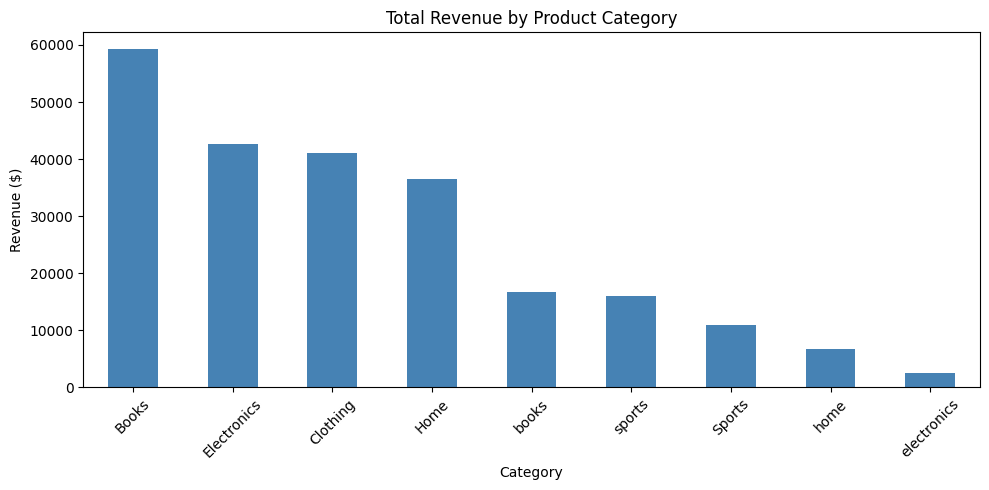


monthly revenue trend:
--------------------------------------------------------------------------------
                        Total Revenue  Number of Transactions  \
transaction_month_year                                          
2024-01                      16720.37                      34   
2024-02                      15267.49                      33   
2024-03                      16333.31                      33   
2024-04                      19952.66                      37   
2024-05                      21866.38                      32   
2024-06                      21902.23                      35   
2024-07                      29304.73                      38   
2024-08                      20620.31                      34   
2024-09                      18954.71                      36   
2024-10                      18100.48                      36   
2024-11                      17277.64                      32   
2024-12                      14252.43             

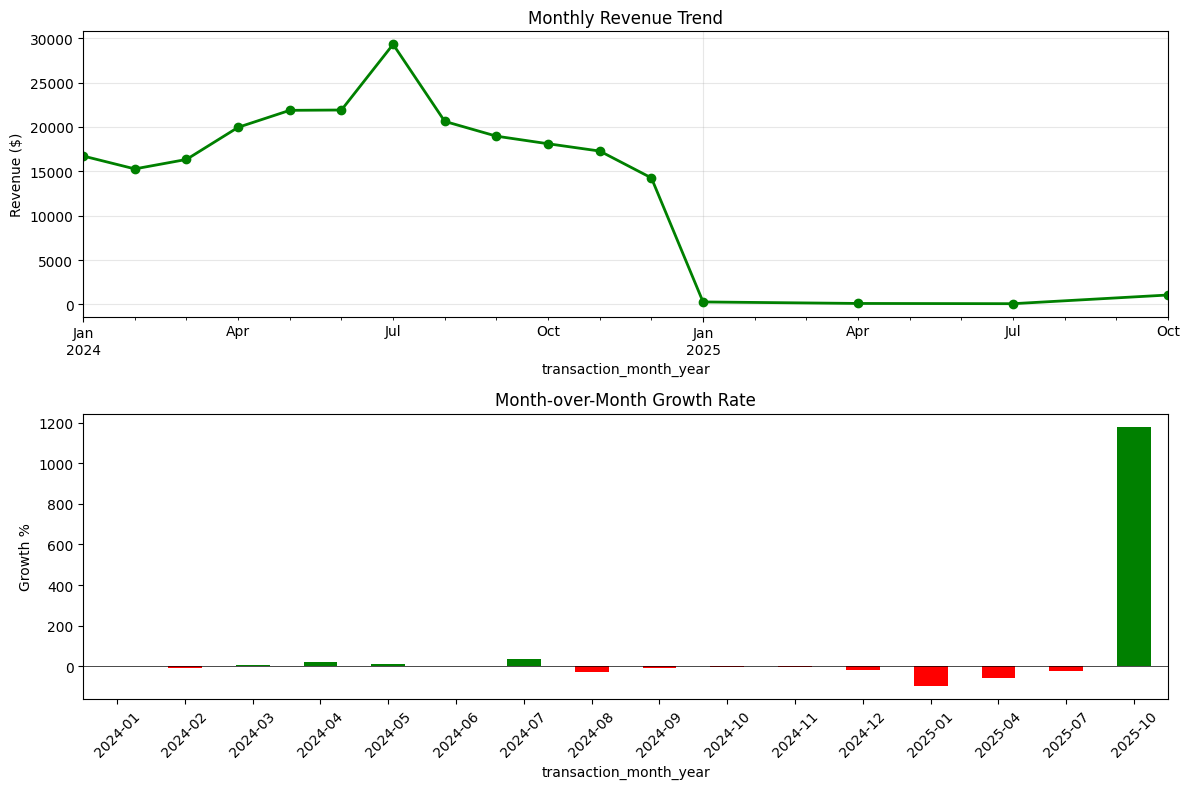


revenue by country (top 5):
--------------------------------------------------------------------------------
             Total Revenue  Number of Transactions  Average Transaction Value
country                                                                      
Italy             31608.49                      43                     735.08
Canada            28011.56                      53                     528.52
Netherlands       26917.24                      39                     690.19
Germany           25734.57                      45                     571.88
Australia         24675.02                      41                     601.83


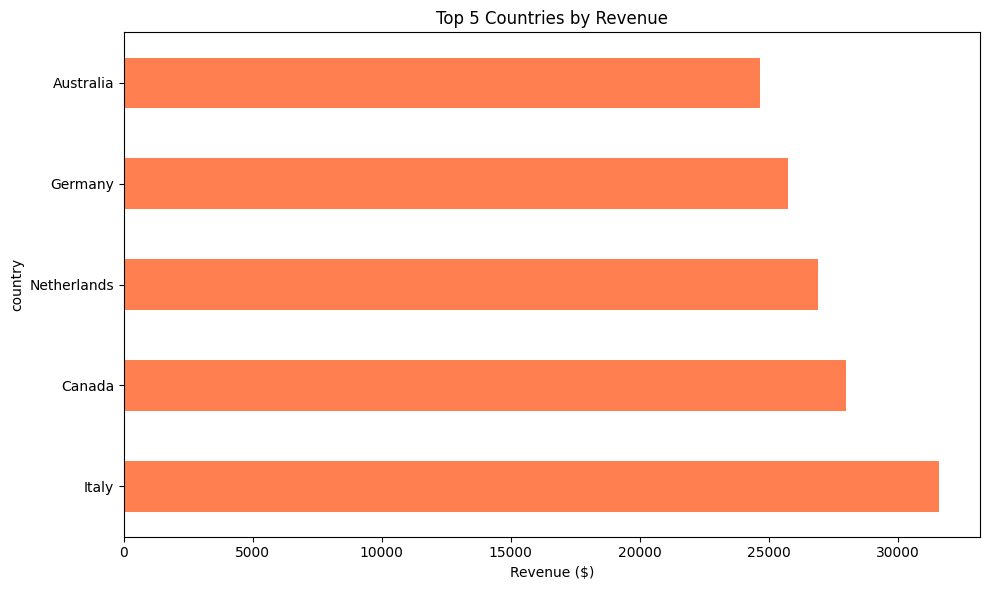


average transaction value by payment method:
--------------------------------------------------------------------------------
                Total Revenue  Number of Transactions  \
payment_method                                          
BANK TRANSFER         4664.43                       5   
Credit Card          79821.85                     132   
PayPal               83838.61                     146   
CREDIT CARD           4080.02                       8   
PAYPAL                2536.54                       5   
Bank Transfer        57146.03                     118   

                Average Transaction Value  
payment_method                             
BANK TRANSFER                      932.89  
Credit Card                        604.71  
PayPal                             574.24  
CREDIT CARD                        510.00  
PAYPAL                             507.31  
Bank Transfer                      484.29  


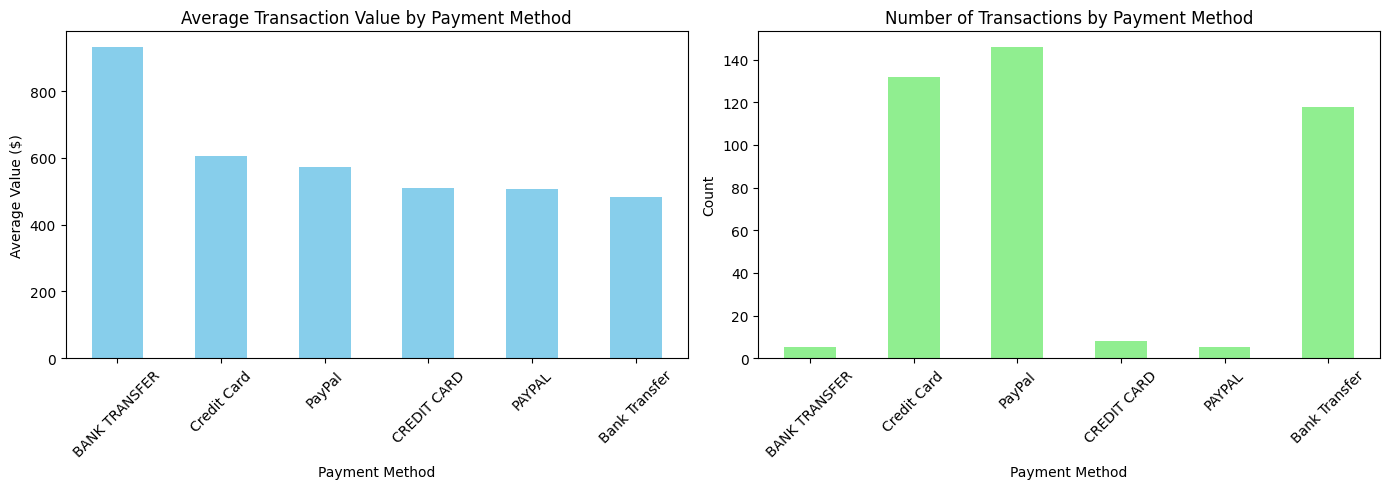

In [725]:

# total revenue by product category

print("\ntotal revenue by product category:")
print("-" * 80)

revenue_by_category = complete_transaction_view.groupby('category')['final_amount'].agg([
    ('Total Revenue', 'sum'),
    ('Number of Transactions', 'count'),
    ('Average Transaction Value', 'mean')
]).round(2).sort_values('Total Revenue', ascending=False)

print(revenue_by_category)

# Visualization
revenue_by_category['Total Revenue'].plot(kind='bar', figsize=(10, 5), color='steelblue')
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue ($)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# monthly revenue trend

print("\nmonthly revenue trend:")
print("-" * 80)

# Create month-year column for proper ordering
complete_transaction_view['transaction_month_year'] = complete_transaction_view['transaction_date'].dt.to_period('M')

monthly_revenue = complete_transaction_view.groupby('transaction_month_year')['final_amount'].agg([
    ('Total Revenue', 'sum'),
    ('Number of Transactions', 'count'),
    ('Average Transaction Value', 'mean')
]).round(2)

# Calculate month-over-month growth
monthly_revenue['MoM Growth %'] = monthly_revenue['Total Revenue'].pct_change() * 100
monthly_revenue['MoM Growth %'] = monthly_revenue['MoM Growth %'].round(2)

print(monthly_revenue)

# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Revenue trend
monthly_revenue['Total Revenue'].plot(ax=ax1, kind='line', marker='o', color='green', linewidth=2)
ax1.set_title('Monthly Revenue Trend')
ax1.set_ylabel('Revenue ($)')
ax1.grid(True, alpha=0.3)

# Growth rate
monthly_revenue['MoM Growth %'].plot(ax=ax2, kind='bar', color=['red' if x < 0 else 'green' for x in monthly_revenue['MoM Growth %']])
ax2.set_title('Month-over-Month Growth Rate')
ax2.set_ylabel('Growth %')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# revenue by country (top 5)

print("\nrevenue by country (top 5):")
print("-" * 80)

# Check if country column exists
if 'country' in complete_transaction_view.columns:
    revenue_by_country = complete_transaction_view.groupby('country')['final_amount'].agg([
        ('Total Revenue', 'sum'),
        ('Number of Transactions', 'count'),
        ('Average Transaction Value', 'mean')
    ]).round(2).sort_values('Total Revenue', ascending=False).head(5)
    
    print(revenue_by_country)
    
    # Visualization
    revenue_by_country['Total Revenue'].plot(kind='barh', figsize=(10, 6), color='coral')
    plt.title('Top 5 Countries by Revenue')
    plt.xlabel('Revenue ($)')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ 'country' column not found in data")
    print(f"Available columns: {list(complete_transaction_view.columns)}")


# average transaction value by payment method
print("\naverage transaction value by payment method:")
print("-" * 80)

# Check if payment_method column exists
if 'payment_method' in complete_transaction_view.columns:
    revenue_by_payment = complete_transaction_view.groupby('payment_method')['final_amount'].agg([
        ('Total Revenue', 'sum'),
        ('Number of Transactions', 'count'),
        ('Average Transaction Value', 'mean')
    ]).round(2).sort_values('Average Transaction Value', ascending=False)
    
    print(revenue_by_payment)
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    revenue_by_payment['Average Transaction Value'].plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title('Average Transaction Value by Payment Method')
    ax1.set_ylabel('Average Value ($)')
    ax1.set_xlabel('Payment Method')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    revenue_by_payment['Number of Transactions'].plot(kind='bar', ax=ax2, color='lightgreen')
    ax2.set_title('Number of Transactions by Payment Method')
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Payment Method')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("'payment_method' column not found in data")
    print(f"Available columns: {list(complete_transaction_view.columns)}")


### 2. Customer Behavior


 top 10 customers by number of purchases :
--------------------------------------------------------------------------------
             Number of Purchases  Total Spending             name
customer_id                                                      
C034                           8         3711.78    Abigail Davis
C113                           7         5768.41     Sophia Davis
C145                           7         3546.16      Ethan Davis
C012                           6         2114.87      James White
C118                           6         3143.82        Ava Smith
C047                           6         4884.83  Olivia Anderson
C177                           5         1257.48      Emma Martin
C141                           5         3855.01     James Miller
C075                           5         4368.05  Evelyn Anderson
C173                           5         4293.10    Abigail Davis


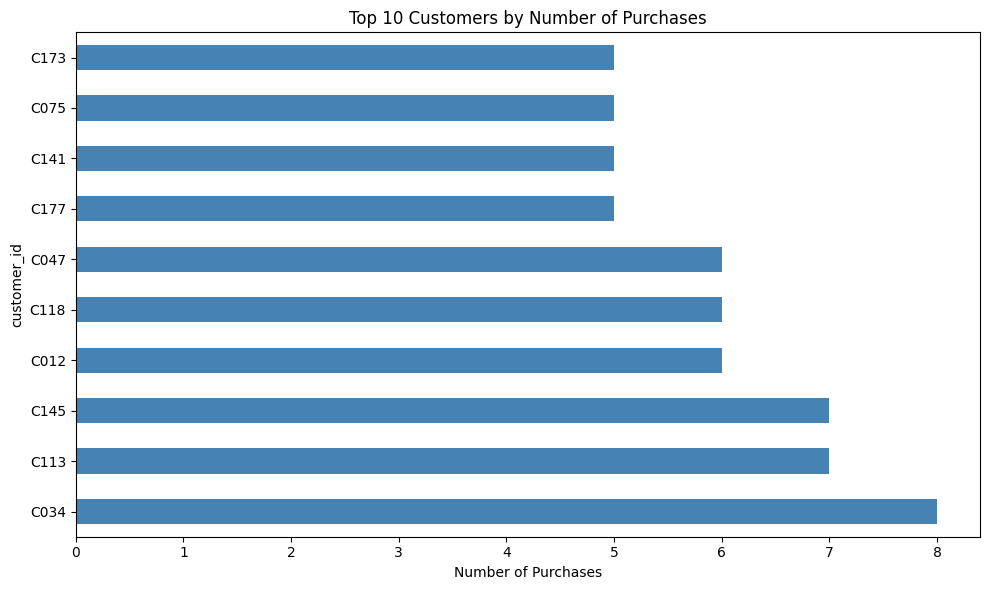


average spending by age group:
--------------------------------------------------------------------------------
           Average Spending  Total Spending  Number of Transactions
age_group                                                          
31-45                614.95        71334.67                     116
46-60                553.55        65319.25                     118
61+                  547.53        65156.27                     119
18-30                496.35        30277.29                      61


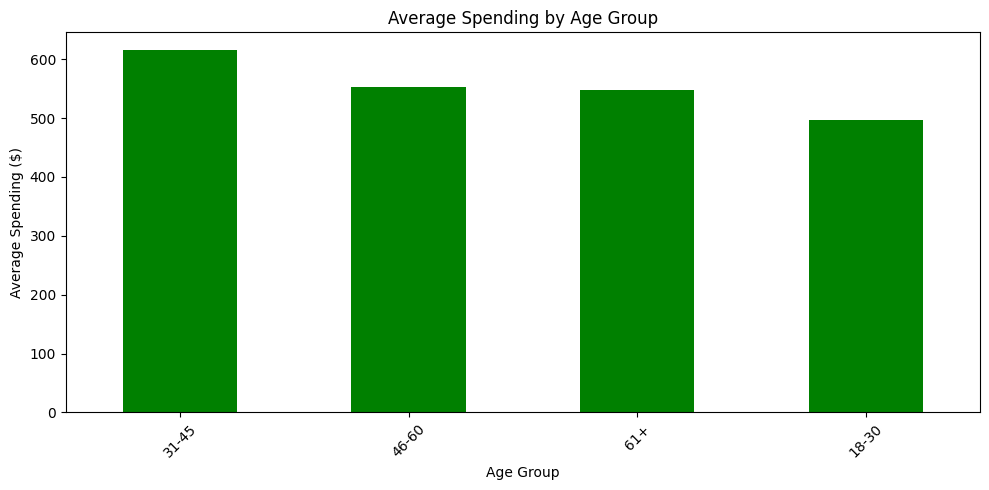


most popular product category by country:
--------------------------------------------------------------------------------
          Country Most Popular Category  Transactions   Revenue
1          Canada                 Books            17   5865.42
3         Germany                 Books            16   7619.96
7           Spain                 Books            15   5444.46
9   United States                 Books            15   5013.97
2          France                 Books            14   7811.54
8  United Kingdom                 Books            14   5838.69
0       Australia                  Home            13   6316.57
6     Netherlands           Electronics            12  11148.48
4           Italy              Clothing            11   6027.68
5           Japan                 Books            10   4748.03


/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_60792/2640841608.py:52: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  popular_category_by_country = complete_transaction_view.groupby('country').apply(


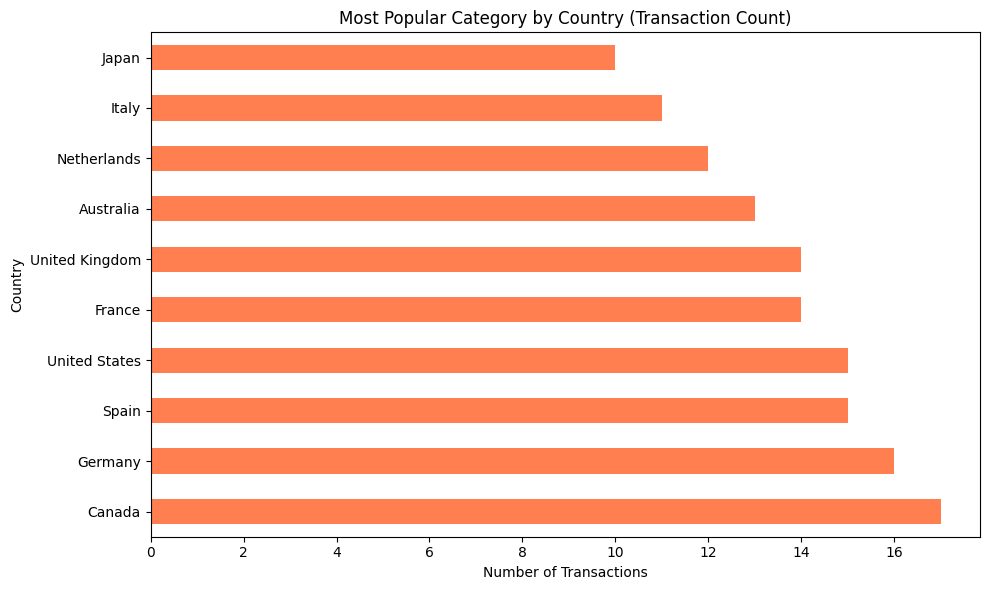


weekend VS. weekday transaction patterns:
--------------------------------------------------------------------------------
         Number of Transactions  Total Revenue  Average Transaction Value  \
Weekday                     318      161355.61                     548.83   
Weekend                     126       70731.88                     589.43   

         Average Quantity  
Weekday              2.98  
Weekend              2.76  

DETAILED BREAKDOWN BY DAY OF WEEK:
--------------------------------------------------------------------------------
                         Number of Transactions  Total Revenue  \
transaction_day_of_week                                          
Monday                                       63       33693.61   
Tuesday                                      63       30078.85   
Wednesday                                    66       32883.40   
Thursday                                     67       34049.21   
Friday                                       59

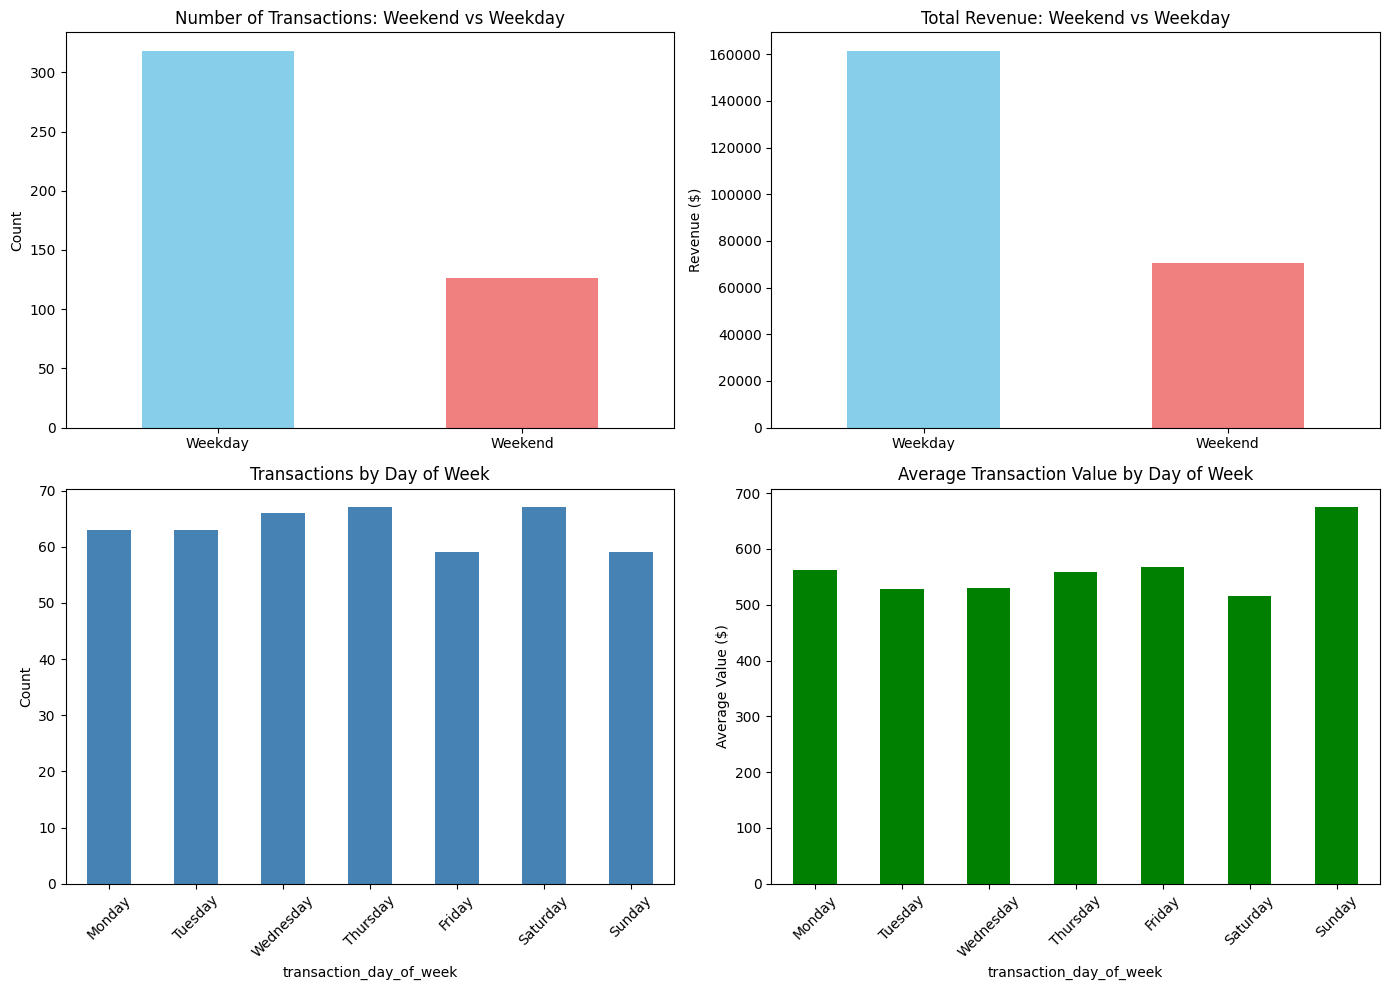

In [726]:


# number of purchases per customer
print("\n top 10 customers by number of purchases :")
print("-" * 80)

top_10_customers = complete_transaction_view.groupby('customer_id').agg({
    'transaction_id': 'count',
    'final_amount': 'sum',
    'name': 'first'
}).rename(columns={
    'transaction_id': 'Number of Purchases',
    'final_amount': 'Total Spending'
}).sort_values('Number of Purchases', ascending=False).head(10).round(2)

print(top_10_customers)

# Visualization
top_10_customers['Number of Purchases'].plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 10 Customers by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.tight_layout()
plt.show()


# average spending by age group
print("\naverage spending by age group:")
print("-" * 80)

spending_by_age_group = complete_transaction_view.groupby('age_group')['final_amount'].agg([
    ('Average Spending', 'mean'),
    ('Total Spending', 'sum'),
    ('Number of Transactions', 'count')
]).round(2).sort_values('Average Spending', ascending=False)

print(spending_by_age_group)

# Visualization
spending_by_age_group['Average Spending'].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Average Spending by Age Group')
plt.ylabel('Average Spending ($)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# most popular product category by country

print("\nmost popular product category by country:")
print("-" * 80)

# Check if country column exists
if 'country' in complete_transaction_view.columns:
    popular_category_by_country = complete_transaction_view.groupby('country').apply(
        lambda x: x['category'].value_counts().index[0]
    ).reset_index()
    popular_category_by_country.columns = ['Country', 'Most Popular Category']
    
    # Add transaction count and revenue for each
    category_stats = []
    for country in popular_category_by_country['Country'].unique():
        category = popular_category_by_country[popular_category_by_country['Country'] == country]['Most Popular Category'].values[0]
        transactions = len(complete_transaction_view[(complete_transaction_view['country'] == country) & (complete_transaction_view['category'] == category)])
        revenue = complete_transaction_view[(complete_transaction_view['country'] == country) & (complete_transaction_view['category'] == category)]['final_amount'].sum()
        category_stats.append({
            'Country': country,
            'Most Popular Category': category,
            'Transactions': transactions,
            'Revenue': round(revenue, 2)
        })
    
    popular_category_df = pd.DataFrame(category_stats).sort_values('Transactions', ascending=False)
    print(popular_category_df)
    
    # Visualization
    popular_category_df.set_index('Country')['Transactions'].plot(kind='barh', figsize=(10, 6), color='coral')
    plt.title('Most Popular Category by Country (Transaction Count)')
    plt.xlabel('Number of Transactions')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ 'country' column not found in data")
    print(f"Available columns: {list(complete_transaction_view.columns)}")


# weekend VS. weekday transaction patterns
print("\nweekend VS. weekday transaction patterns:")
print("-" * 80)

weekend_pattern = complete_transaction_view.groupby('is_weekend').agg({
    'transaction_id': 'count',
    'final_amount': ['sum', 'mean'],
    'quantity': 'mean'
}).round(2)

weekend_pattern.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value', 'Average Quantity']
weekend_pattern.index = ['Weekday', 'Weekend']

print(weekend_pattern)

# Breakdown by day of week
print("\nDETAILED BREAKDOWN BY DAY OF WEEK:")
print("-" * 80)

day_pattern = complete_transaction_view.groupby('transaction_day_of_week').agg({
    'transaction_id': 'count',
    'final_amount': ['sum', 'mean']
}).round(2)

day_pattern.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value']

# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_pattern = day_pattern.reindex([day for day in day_order if day in day_pattern.index])

print(day_pattern)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Weekend vs Weekday - Transactions
weekend_data = complete_transaction_view.groupby('is_weekend')['transaction_id'].count()
weekend_data.index = ['Weekday', 'Weekend']
weekend_data.plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Number of Transactions: Weekend vs Weekday')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Weekend vs Weekday - Revenue
weekend_revenue = complete_transaction_view.groupby('is_weekend')['final_amount'].sum()
weekend_revenue.index = ['Weekday', 'Weekend']
weekend_revenue.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Total Revenue: Weekend vs Weekday')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Day of week - Transactions
day_transactions = complete_transaction_view.groupby('transaction_day_of_week')['transaction_id'].count()
day_transactions = day_transactions.reindex([day for day in day_order if day in day_transactions.index])
day_transactions.plot(kind='bar', ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Transactions by Day of Week')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Day of week - Average transaction value
day_avg = complete_transaction_view.groupby('transaction_day_of_week')['final_amount'].mean()
day_avg = day_avg.reindex([day for day in day_order if day in day_avg.index])
day_avg.plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Average Transaction Value by Day of Week')
axes[1, 1].set_ylabel('Average Value ($)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



 top 10 customers by number of purchases :
--------------------------------------------------------------------------------
             Number of Purchases  Total Spending             name
customer_id                                                      
C034                           8         3711.78    Abigail Davis
C113                           7         5768.41     Sophia Davis
C145                           7         3546.16      Ethan Davis
C012                           6         2114.87      James White
C118                           6         3143.82        Ava Smith
C047                           6         4884.83  Olivia Anderson
C177                           5         1257.48      Emma Martin
C141                           5         3855.01     James Miller
C075                           5         4368.05  Evelyn Anderson
C173                           5         4293.10    Abigail Davis


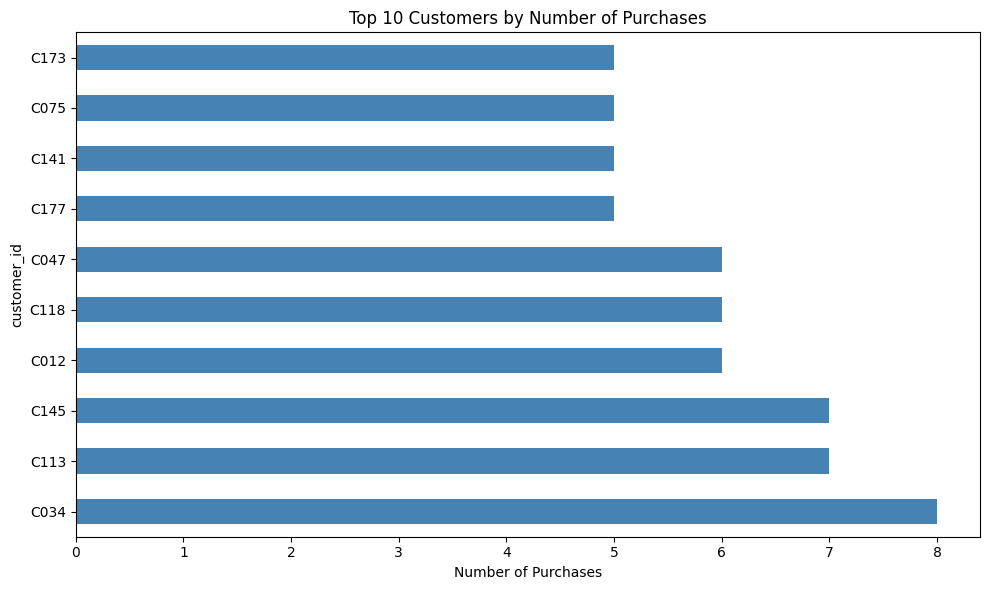


average spending by age group:
--------------------------------------------------------------------------------
           Average Spending  Total Spending  Number of Transactions
age_group                                                          
31-45                614.95        71334.67                     116
46-60                553.55        65319.25                     118
61+                  547.53        65156.27                     119
18-30                496.35        30277.29                      61


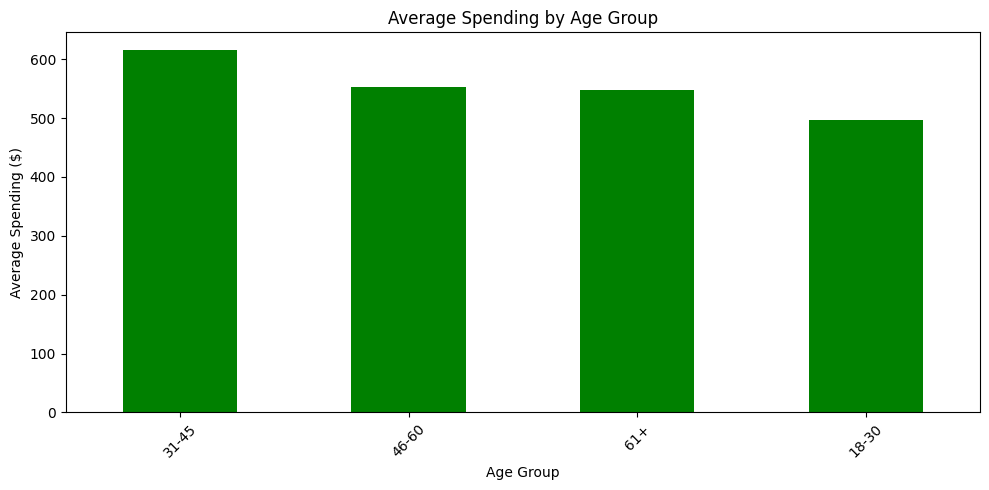


most popular product category by country:
--------------------------------------------------------------------------------
          Country Most Popular Category  Transactions   Revenue
1          Canada                 Books            17   5865.42
3         Germany                 Books            16   7619.96
7           Spain                 Books            15   5444.46
9   United States                 Books            15   5013.97
2          France                 Books            14   7811.54
8  United Kingdom                 Books            14   5838.69
0       Australia                  Home            13   6316.57
6     Netherlands           Electronics            12  11148.48
4           Italy              Clothing            11   6027.68
5           Japan                 Books            10   4748.03


/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_60792/2640841608.py:52: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  popular_category_by_country = complete_transaction_view.groupby('country').apply(


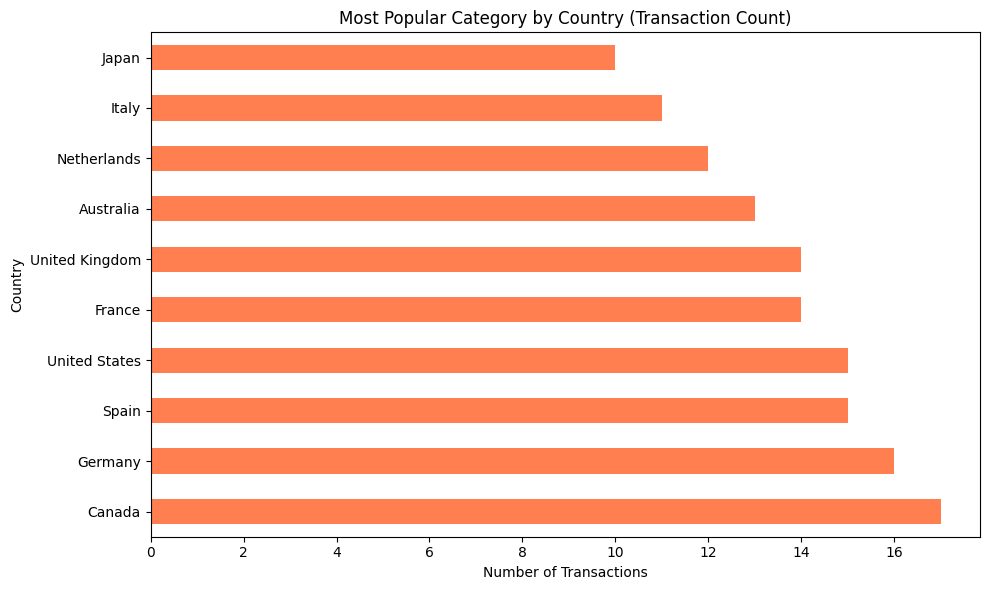


weekend VS. weekday transaction patterns:
--------------------------------------------------------------------------------
         Number of Transactions  Total Revenue  Average Transaction Value  \
Weekday                     318      161355.61                     548.83   
Weekend                     126       70731.88                     589.43   

         Average Quantity  
Weekday              2.98  
Weekend              2.76  

DETAILED BREAKDOWN BY DAY OF WEEK:
--------------------------------------------------------------------------------
                         Number of Transactions  Total Revenue  \
transaction_day_of_week                                          
Monday                                       63       33693.61   
Tuesday                                      63       30078.85   
Wednesday                                    66       32883.40   
Thursday                                     67       34049.21   
Friday                                       59

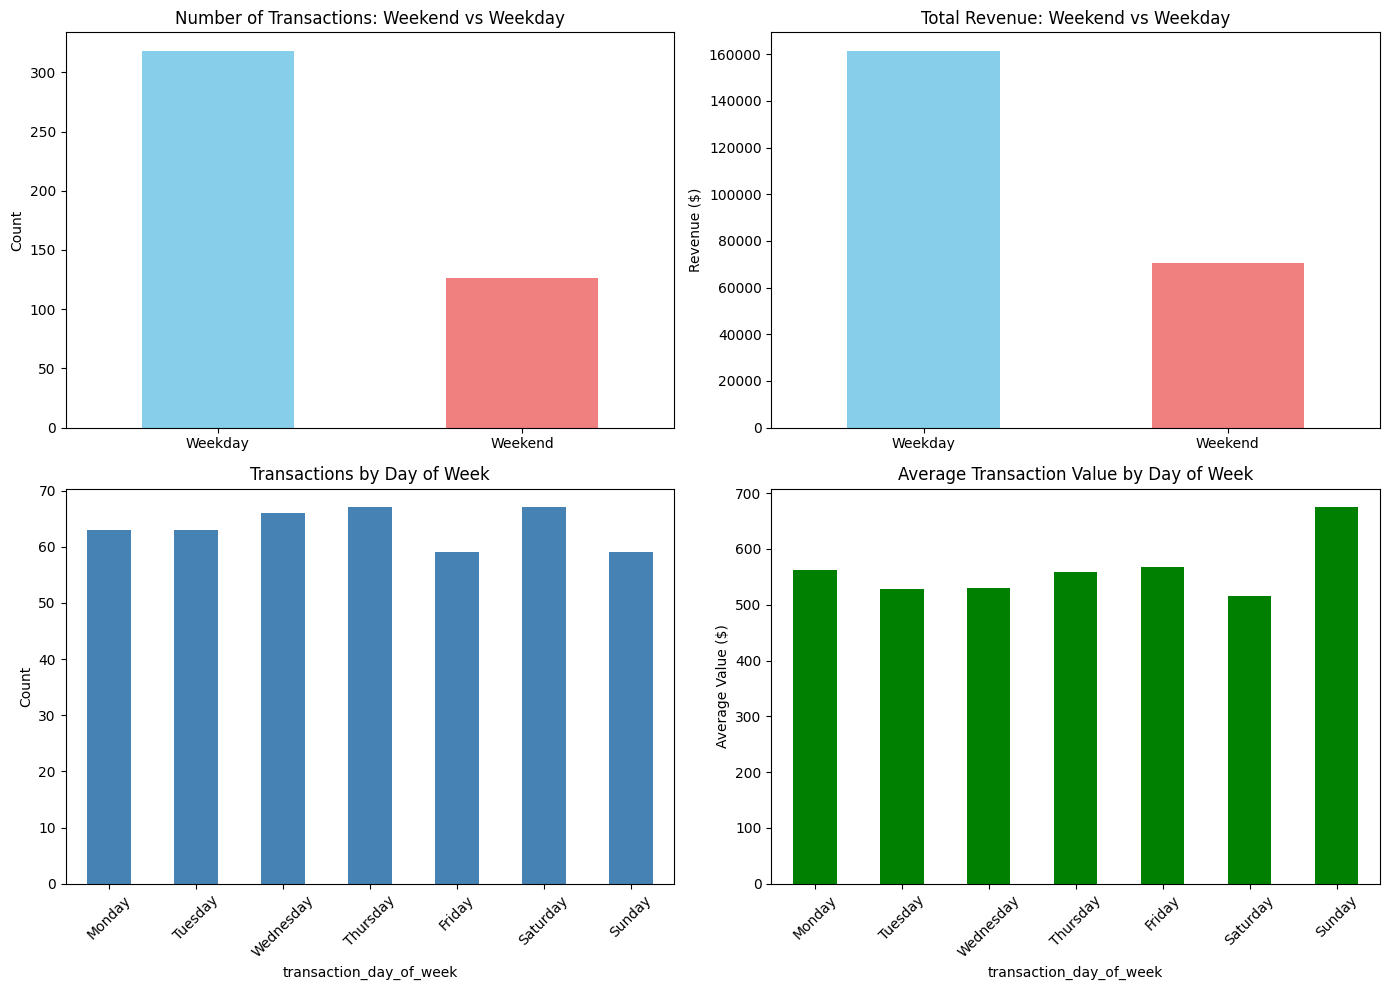

In [727]:


# number of purchases per customer
print("\n top 10 customers by number of purchases :")
print("-" * 80)

top_10_customers = complete_transaction_view.groupby('customer_id').agg({
    'transaction_id': 'count',
    'final_amount': 'sum',
    'name': 'first'
}).rename(columns={
    'transaction_id': 'Number of Purchases',
    'final_amount': 'Total Spending'
}).sort_values('Number of Purchases', ascending=False).head(10).round(2)

print(top_10_customers)

# Visualization
top_10_customers['Number of Purchases'].plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 10 Customers by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.tight_layout()
plt.show()


# average spending by age group
print("\naverage spending by age group:")
print("-" * 80)

spending_by_age_group = complete_transaction_view.groupby('age_group')['final_amount'].agg([
    ('Average Spending', 'mean'),
    ('Total Spending', 'sum'),
    ('Number of Transactions', 'count')
]).round(2).sort_values('Average Spending', ascending=False)

print(spending_by_age_group)

# Visualization
spending_by_age_group['Average Spending'].plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Average Spending by Age Group')
plt.ylabel('Average Spending ($)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# most popular product category by country

print("\nmost popular product category by country:")
print("-" * 80)

# Check if country column exists
if 'country' in complete_transaction_view.columns:
    popular_category_by_country = complete_transaction_view.groupby('country').apply(
        lambda x: x['category'].value_counts().index[0]
    ).reset_index()
    popular_category_by_country.columns = ['Country', 'Most Popular Category']
    
    # Add transaction count and revenue for each
    category_stats = []
    for country in popular_category_by_country['Country'].unique():
        category = popular_category_by_country[popular_category_by_country['Country'] == country]['Most Popular Category'].values[0]
        transactions = len(complete_transaction_view[(complete_transaction_view['country'] == country) & (complete_transaction_view['category'] == category)])
        revenue = complete_transaction_view[(complete_transaction_view['country'] == country) & (complete_transaction_view['category'] == category)]['final_amount'].sum()
        category_stats.append({
            'Country': country,
            'Most Popular Category': category,
            'Transactions': transactions,
            'Revenue': round(revenue, 2)
        })
    
    popular_category_df = pd.DataFrame(category_stats).sort_values('Transactions', ascending=False)
    print(popular_category_df)
    
    # Visualization
    popular_category_df.set_index('Country')['Transactions'].plot(kind='barh', figsize=(10, 6), color='coral')
    plt.title('Most Popular Category by Country (Transaction Count)')
    plt.xlabel('Number of Transactions')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ 'country' column not found in data")
    print(f"Available columns: {list(complete_transaction_view.columns)}")


# weekend VS. weekday transaction patterns
print("\nweekend VS. weekday transaction patterns:")
print("-" * 80)

weekend_pattern = complete_transaction_view.groupby('is_weekend').agg({
    'transaction_id': 'count',
    'final_amount': ['sum', 'mean'],
    'quantity': 'mean'
}).round(2)

weekend_pattern.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value', 'Average Quantity']
weekend_pattern.index = ['Weekday', 'Weekend']

print(weekend_pattern)

# Breakdown by day of week
print("\nDETAILED BREAKDOWN BY DAY OF WEEK:")
print("-" * 80)

day_pattern = complete_transaction_view.groupby('transaction_day_of_week').agg({
    'transaction_id': 'count',
    'final_amount': ['sum', 'mean']
}).round(2)

day_pattern.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value']

# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_pattern = day_pattern.reindex([day for day in day_order if day in day_pattern.index])

print(day_pattern)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Weekend vs Weekday - Transactions
weekend_data = complete_transaction_view.groupby('is_weekend')['transaction_id'].count()
weekend_data.index = ['Weekday', 'Weekend']
weekend_data.plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Number of Transactions: Weekend vs Weekday')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Weekend vs Weekday - Revenue
weekend_revenue = complete_transaction_view.groupby('is_weekend')['final_amount'].sum()
weekend_revenue.index = ['Weekday', 'Weekend']
weekend_revenue.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Total Revenue: Weekend vs Weekday')
axes[0, 1].set_ylabel('Revenue ($)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Day of week - Transactions
day_transactions = complete_transaction_view.groupby('transaction_day_of_week')['transaction_id'].count()
day_transactions = day_transactions.reindex([day for day in day_order if day in day_transactions.index])
day_transactions.plot(kind='bar', ax=axes[1, 0], color='steelblue')
axes[1, 0].set_title('Transactions by Day of Week')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Day of week - Average transaction value
day_avg = complete_transaction_view.groupby('transaction_day_of_week')['final_amount'].mean()
day_avg = day_avg.reindex([day for day in day_order if day in day_avg.index])
day_avg.plot(kind='bar', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Average Transaction Value by Day of Week')
axes[1, 1].set_ylabel('Average Value ($)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


### 3. Product Performance


top 10 products by revenue:
--------------------------------------------------------------------------------
             product_name     category  Total Revenue  Number of Transactions
product_id                                                                   
P047        Fiction Novel        Books       14060.83                      14
P001              Speaker  Electronics       12813.35                      10
P029            Plant Pot         Home       11277.97                      11
P040             Cookbook        Books       11140.78                      19
P005        Running Shoes       sports       11128.71                      11
P023              Blanket         Home       10994.31                      12
P008             Cookbook        Books       10063.54                      11
P049                Scarf     Clothing        9712.88                      10
P018           Smartphone  Electronics        9665.77                       7
P007        Tennis Racket       

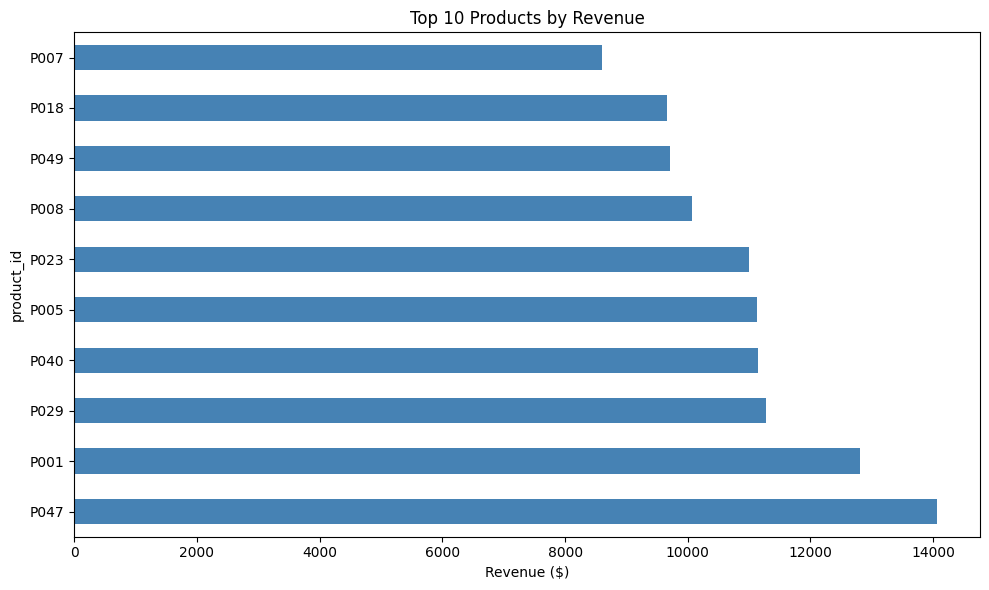


top 10 products by quantity sold:
--------------------------------------------------------------------------------
             product_name     category  Total Quantity Sold  Total Revenue
product_id                                                                
P040             Cookbook        Books                 67.0       11140.78
P047        Fiction Novel        Books                 49.0       14060.83
P037                Mouse  Electronics                 43.0           0.00
P001              Speaker  Electronics                 39.0       12813.35
P033                Shoes     Clothing                 39.0        3193.74
P038                Dress     Clothing                 38.0         657.24
P049                Scarf     Clothing                 35.0        9712.88
P005        Running Shoes       sports                 35.0       11128.71
P044               Camera  Electronics                 35.0         572.25
P008             Cookbook        Books                 35.0

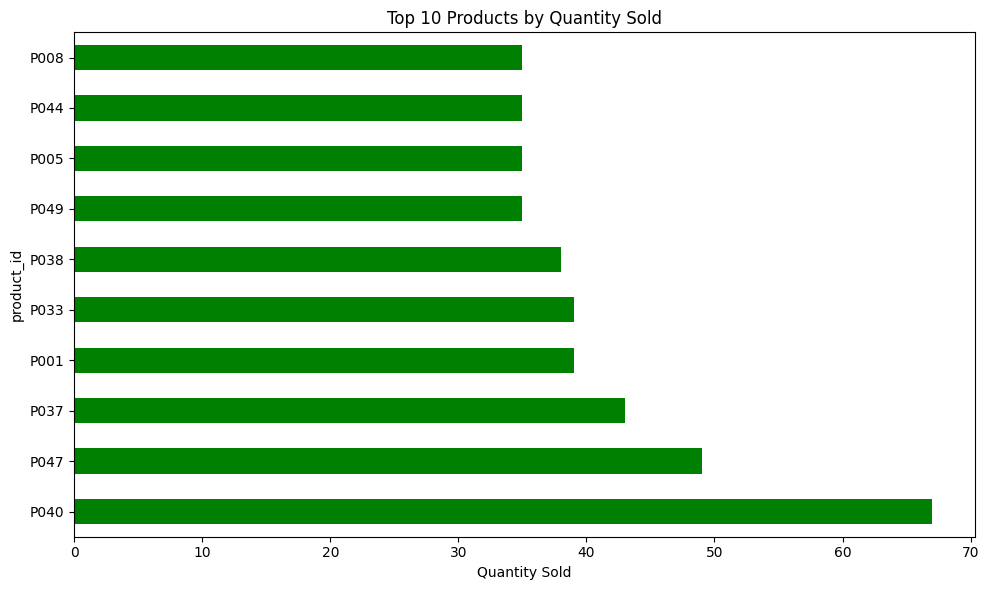


category with highest average transaction value:
--------------------------------------------------------------------------------
             Average Transaction Value  Total Revenue  Number of Transactions
category                                                                     
electronics                    1217.96        2435.93                       2
sports                          839.76       15955.44                      19
Sports                          780.12       10921.67                      14
books                           642.58       16707.15                      26
Home                            579.87       36532.10                      63
Clothing                        569.83       41027.56                      72
Electronics                     538.82       42566.66                      79
Books                           477.87       59255.51                     124
home                            445.70        6685.47                      15


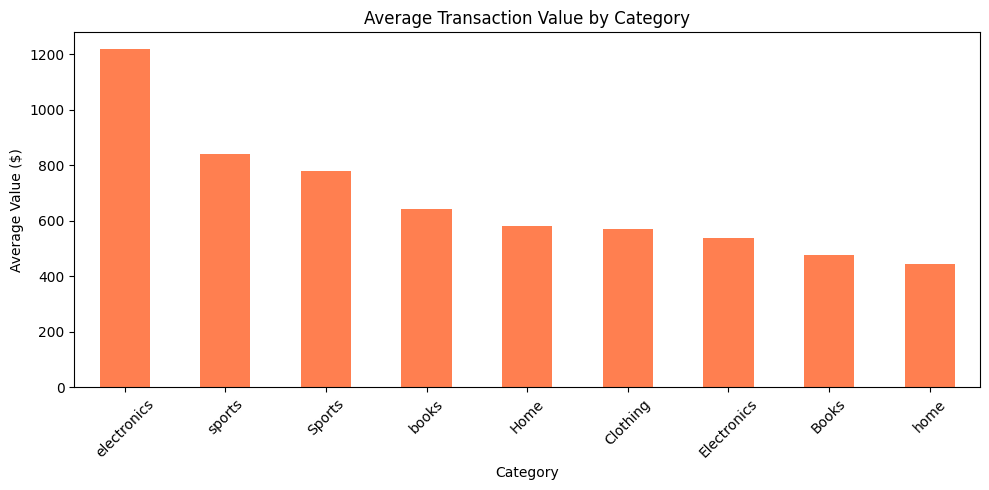


slow-moving products (low sales):
--------------------------------------------------------------------------------
            product_name     category  Total Quantity Sold  Total Revenue  \
product_id                                                                  
P016              Mirror         Home                  5.0        1374.55   
P048              Camera  electronics                  8.0        2435.93   
P013              Laptop  Electronics                 10.0        1430.60   
P041             T-Shirt     Clothing                 11.0        3316.74   
P003             Sweater     Clothing                 12.0         282.36   
P015           Biography        Books                 13.0         427.37   
P046              Mirror         home                 14.0        3702.92   
P031              Jacket     Clothing                 14.0        5000.99   
P039              Candle         Home                 15.0        3763.35   
P028        Fantasy Book        Books

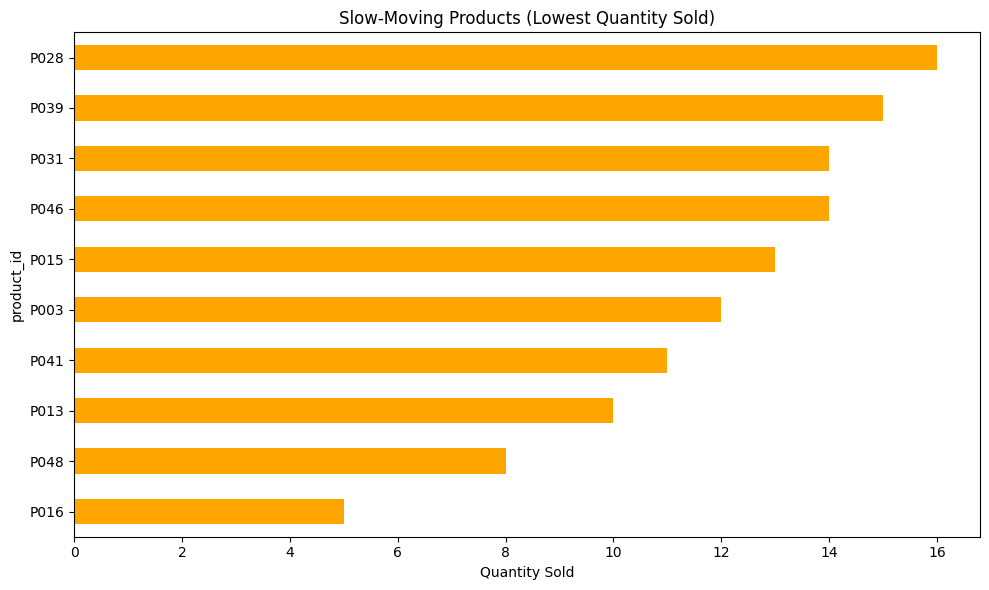

In [728]:
# top 10 products by revenue
print("\ntop 10 products by revenue:")
print("-" * 80)

top_10_revenue = complete_transaction_view.groupby('product_id').agg({
    'product_name': 'first',
    'category': 'first',
    'final_amount': 'sum',
    'transaction_id': 'count'
}).rename(columns={
    'final_amount': 'Total Revenue',
    'transaction_id': 'Number of Transactions'
}).sort_values('Total Revenue', ascending=False).head(10).round(2)

print(top_10_revenue)

# Visualization
top_10_revenue['Total Revenue'].plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue ($)')
plt.tight_layout()
plt.show()


# top 10 products by quantity sold
print("\ntop 10 products by quantity sold:")
print("-" * 80)

top_10_quantity = complete_transaction_view.groupby('product_id').agg({
    'product_name': 'first',
    'category': 'first',
    'quantity': 'sum',
    'final_amount': 'sum'
}).rename(columns={
    'quantity': 'Total Quantity Sold',
    'final_amount': 'Total Revenue'
}).sort_values('Total Quantity Sold', ascending=False).head(10).round(2)

print(top_10_quantity)

# Visualization
top_10_quantity['Total Quantity Sold'].plot(kind='barh', figsize=(10, 6), color='green')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.tight_layout()
plt.show()


# category with highest average transaction value
print("\ncategory with highest average transaction value:")
print("-" * 80)

category_avg_value = complete_transaction_view.groupby('category')['final_amount'].agg([
    ('Average Transaction Value', 'mean'),
    ('Total Revenue', 'sum'),
    ('Number of Transactions', 'count')
]).round(2).sort_values('Average Transaction Value', ascending=False)

print(category_avg_value)

# Visualization
category_avg_value['Average Transaction Value'].plot(kind='bar', figsize=(10, 5), color='coral')
plt.title('Average Transaction Value by Category')
plt.ylabel('Average Value ($)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# identify slow-moving products (low sales)
print("\nslow-moving products (low sales):")
print("-" * 80)

slow_moving = complete_transaction_view.groupby('product_id').agg({
    'product_name': 'first',
    'category': 'first',
    'quantity': 'sum',
    'final_amount': 'sum',
    'transaction_id': 'count'
}).rename(columns={
    'quantity': 'Total Quantity Sold',
    'final_amount': 'Total Revenue',
    'transaction_id': 'Number of Transactions'
}).sort_values('Total Quantity Sold', ascending=True).head(10).round(2)

print(slow_moving)

# Visualization
slow_moving['Total Quantity Sold'].plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Slow-Moving Products (Lowest Quantity Sold)')
plt.xlabel('Quantity Sold')
plt.tight_layout()
plt.show()

### 4. Create Summary Tables


pivot table: category vs. country (total revenue):
--------------------------------------------------------------------------------
country      Australia   Canada   France  Germany    Italy    Japan  \
category                                                              
Books          3877.16  5865.42  7811.54  7619.96  7408.57  4748.03   
Clothing       5540.93  8711.72  4229.77  3897.90  6027.68  1615.75   
Electronics    3349.14  4529.91  2996.14  2152.80  6836.00  3669.34   
Home           6316.57  3618.33  3718.70  6007.50  2426.65  3342.36   
Sports         1673.94   451.44     0.00   491.10  2209.95  1794.79   
books          1448.89  1916.45   874.82  1053.27  3461.24   468.12   
electronics       0.00  1461.56     0.00     0.00     0.00   974.37   
home            274.29  1234.30   262.78  1458.43  1570.16   548.58   
sports         2194.10   222.43  2022.19  3053.61  1668.22   444.86   

country      Netherlands    Spain  United Kingdom  United States  
category          

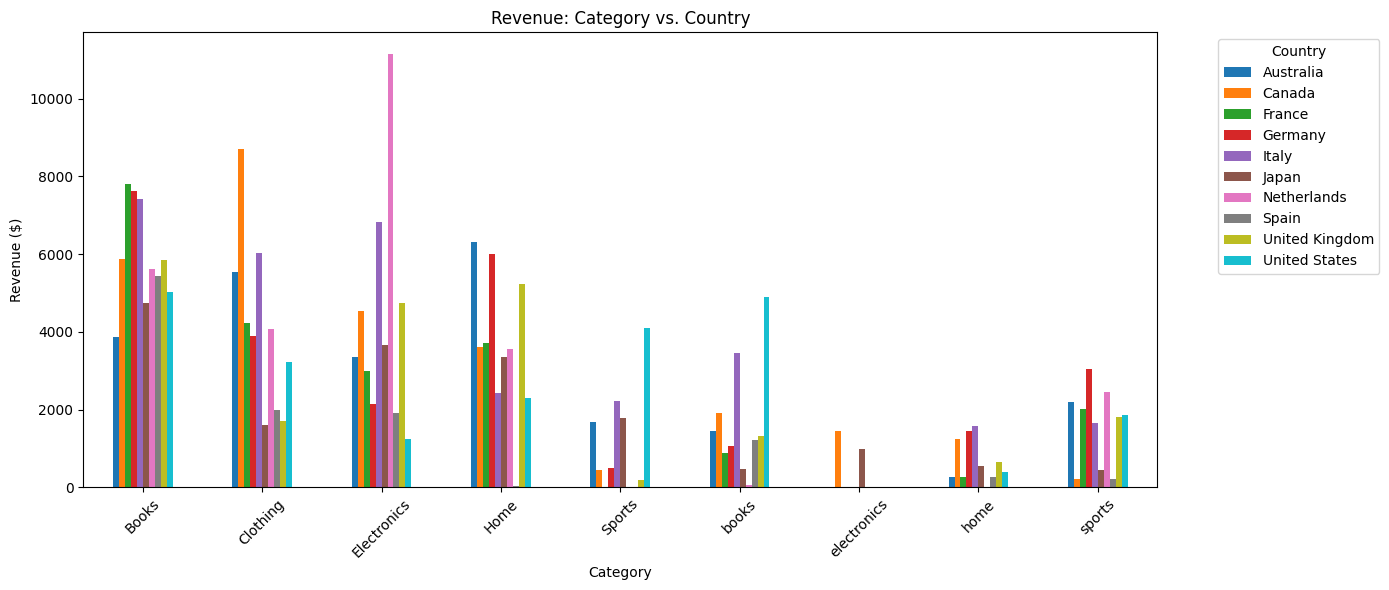


cross-tabulation: age_group vs. customer_segment:
--------------------------------------------------------------------------------
customer_segment  High  Low  Medium  All
age_group                               
18-30               45   17       5   67
31-45              101   13       9  123
46-60               87   19      22  128
61+                 79   21      26  126
All                312   70      62  444


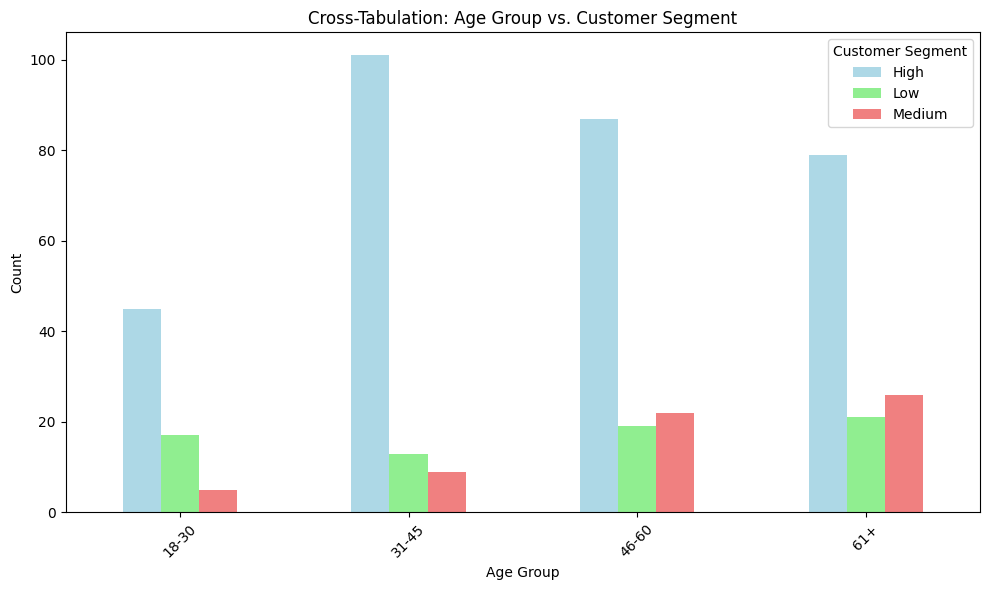


summary statistics: category and customer_segment:
--------------------------------------------------------------------------------
                              Number of Transactions  Total Revenue  \
category    customer_segment                                          
Books       High                                  85       50483.18   
            Low                                   24        3818.03   
            Medium                                15        4954.30   
Clothing    High                                  63       38629.45   
            Low                                    5         774.46   
            Medium                                 4        1623.64   
Electronics High                                  53       36697.48   
            Low                                   14        1896.82   
            Medium                                12        3972.35   
Home        High                                  47       32059.54   
            Low

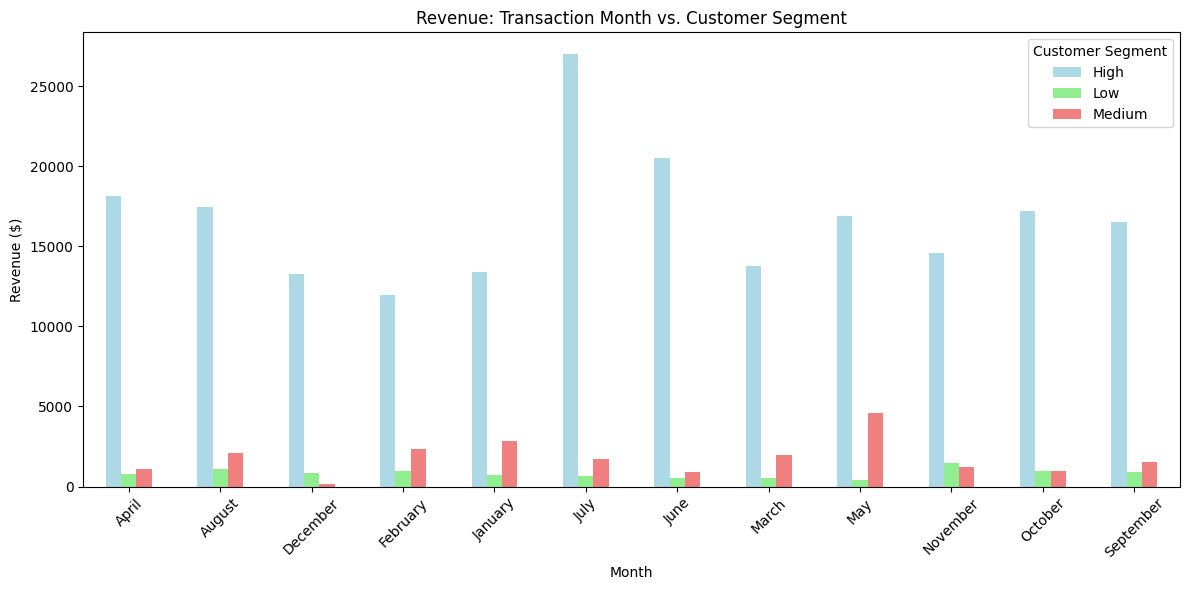


summary statistics: category and age_group:
--------------------------------------------------------------------------------
                       Number of Transactions  Total Revenue  \
category    age_group                                          
Books       18-30                          24       10487.74   
            31-45                          29       19233.56   
            46-60                          29       13109.94   
            61+                            42       16424.27   
Clothing    18-30                           9        6225.98   
            31-45                          28       14229.58   
            46-60                          17       10581.52   
            61+                            18        9990.48   
Electronics 18-30                          13        5593.25   
            31-45                          25       13801.01   
            46-60                          24       14685.86   
            61+                           

In [729]:
# pivot table: category vs. country showing total revenue
print("\npivot table: category vs. country (total revenue):")
print("-" * 80)

if 'country' in complete_transaction_view.columns:
    pivot_category_country = complete_transaction_view.pivot_table(
        values='final_amount',
        index='category',
        columns='country',
        aggfunc='sum'
    ).round(2).fillna(0)
    
    print(pivot_category_country)
    
    # Visualization
    pivot_category_country.plot(kind='bar', figsize=(14, 6))
    plt.title('Revenue: Category vs. Country')
    plt.ylabel('Revenue ($)')
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("⚠ 'country' column not found in data")


# cross-tabulation: age_group vs. customer_segment
print("\ncross-tabulation: age_group vs. customer_segment:")
print("-" * 80)

crosstab_age_segment = pd.crosstab(
    complete_transaction_view['age_group'],
    complete_transaction_view['customer_segment'],
    margins=True
)

print(crosstab_age_segment)

# Visualization
crosstab_age_segment_no_margins = pd.crosstab(
    complete_transaction_view['age_group'],
    complete_transaction_view['customer_segment']
)

crosstab_age_segment_no_margins.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Cross-Tabulation: Age Group vs. Customer Segment')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


# summary statistics grouped by multiple dimensions
print("\nsummary statistics: category and customer_segment:")
print("-" * 80)

summary_multi = complete_transaction_view.groupby(['category', 'customer_segment']).agg({
    'final_amount': ['count', 'sum', 'mean'],
    'quantity': 'mean',
    'discount': 'sum'
}).round(2)

summary_multi.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value', 'Average Quantity', 'Total Discount']

print(summary_multi)


# summary statistics grouped by age_group and payment method
print("\nsummary statistics: age_group and payment_method:")
print("-" * 80)

if 'payment_method' in complete_transaction_view.columns:
    summary_age_payment = complete_transaction_view.groupby(['age_group', 'payment_method']).agg({
        'final_amount': ['count', 'sum', 'mean'],
        'quantity': 'mean'
    }).round(2)
    
    summary_age_payment.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value', 'Average Quantity']
    
    print(summary_age_payment)
else:
    print("⚠ 'payment_method' column not found in data")


# summary statistics grouped by transaction_month and customer_segment
print("\nsummary statistics: transaction_month and customer_segment:")
print("-" * 80)

summary_month_segment = complete_transaction_view.groupby(['transaction_month', 'customer_segment']).agg({
    'final_amount': ['count', 'sum', 'mean'],
    'quantity': 'mean'
}).round(2)

summary_month_segment.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value', 'Average Quantity']

print(summary_month_segment)

# Visualization
month_segment_pivot = complete_transaction_view.pivot_table(
    values='final_amount',
    index='transaction_month',
    columns='customer_segment',
    aggfunc='sum'
).round(2)

month_segment_pivot.plot(kind='bar', figsize=(12, 6), color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Revenue: Transaction Month vs. Customer Segment')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()


# summary statistics grouped by category and age_group
print("\nsummary statistics: category and age_group:")
print("-" * 80)

summary_category_age = complete_transaction_view.groupby(['category', 'age_group']).agg({
    'final_amount': ['count', 'sum', 'mean'],
    'quantity': 'mean'
}).round(2)

summary_category_age.columns = ['Number of Transactions', 'Total Revenue', 'Average Transaction Value', 'Average Quantity']

print(summary_category_age)